# Analysis of the MNIST dataset using tensorflow

This is project is thought to familiarize myself with different deep learning modules, starting with tensorflows Keras API

In [14]:
import tensorflow as tf

## Load data

The keras api can directly load the data using the .dataset.mnist.load_data() command.

Keras datasets consist are formatted as tuples containing train and test data. Each split into X and y component.


In [15]:
mnist = tf.keras.datasets.mnist.load_data()
[len(i) for i in mnist]


[2, 2]

In [16]:
[X_train, y_train], [X_test, y_test] = mnist

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
print("Minimum value", X_train.min(),"Maximum value", X_train.max())

Minimum value 0 Maximum value 255


X_train contains 60,000 instances, each stored as a 28x28 array indicating the pixels of the image.

Each pixel has a number between 0 and 255, therefore we can normalize them by simply dividing by 255. 

(This is equivalent to min-max scaling: ${x}\prime = \frac{x-min(\bold{x})}{max(\bold{x})-min(\bold{x})}$)

This is plenty, so we can also use some of the instances as validation set. The data is shuffled, therefore the first 5,000 are chosen as validation without randomly selecting.

In [19]:
X_train, X_test = X_train / 255.0, X_test / 255.0

X_valid, X_train_new = X_train[:5000], X_train[5000:]
y_valid, y_train_new = y_train[:5000], y_train[5000:]

In [20]:
X_train_new.shape

(55000, 28, 28)

## Define the model

The Keras api is straight forward. For a first try a simple sequential model is produced to get a baseline for what accuracy we can expect. Hyperparameter tuning follows.

### Model structure

The intput is a 28x28, therefore a flatten layer is necessary.

Two hidden layers are initialized with 300 neurons each.

The output is defined with 10 neurons (numbers 0-9) with a softmax activation function, because we want a probability distribution as a result for classification.

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,810 (1.25 MB)

 Trainable params: 328,810 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling

Next, the model is compiled. This is done by adding the optimizer, loss function and metric to be returned.

Here stochastig gradient descent  is used with sparse_categorical_crossentropy as loss function. Cross entropy as loss is self explanatory as we are dealing with a multiclas clasification problem. Sparse is specified because there will be a lot of zeros in the matrix.

In [23]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Training

In [24]:
history = model.fit(X_train_new, y_train_new, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7274 - loss: 1.0501 - val_accuracy: 0.9146 - val_loss: 0.3087
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9112 - loss: 0.3123 - val_accuracy: 0.9340 - val_loss: 0.2448
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9305 - loss: 0.2457 - val_accuracy: 0.9408 - val_loss: 0.2062
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9404 - loss: 0.2080 - val_accuracy: 0.9470 - val_loss: 0.1862
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9467 - loss: 0.1849 - val_accuracy: 0.9554 - val_loss: 0.1608
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9541 - loss: 0.1618 - val_accuracy: 0.9600 - val_loss: 0.1461
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9605 - loss: 0.1377 - val_accuracy: 0.9658 - val_loss: 0.1354
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9632 - loss: 0.1309 - 

Amazingly, this simple model already returns a 99.31% accurate model!

We can plot the training curve to see, how exactly training affected the loss and accuracy of the model.

<Axes: >

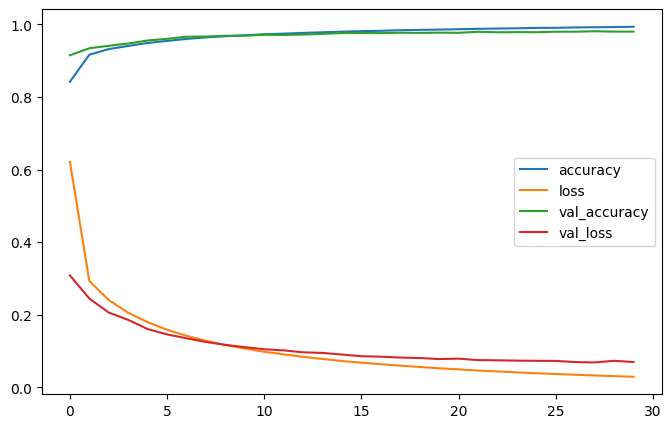

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

historyData = pd.DataFrame(history.history)
historyData.plot(figsize=(8, 5))

We see that the accuracy converges pretty well, but the model tends to overfit the training data. This is visible in the increasing discrapency between the training and validation loss.

To avoid this, thechniques like regularization, dropout, early stopping etc. can be implemented. But first the number of neurons per layer will be lowered and the learning rate adjusted.

## Hyperparameter tuning

In [26]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)
model2.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [27]:
history2 = model2.fit(X_train_new, y_train_new, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.3138 - loss: 2.0895 - val_accuracy: 0.7314 - val_loss: 1.3275
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.7568 - loss: 1.1475 - val_accuracy: 0.8302 - val_loss: 0.7512
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.8359 - loss: 0.7053 - val_accuracy: 0.8654 - val_loss: 0.5596
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.8607 - loss: 0.5515 - val_accuracy: 0.8782 - val_loss: 0.4719
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.8767 - loss: 0.4711 - val_accuracy: 0.8892 - val_loss: 0.4206
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.8854 - loss: 0.4306 - val_accuracy: 0.8946 - val_loss: 0.3876
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.8920 - loss: 0.3960 - val_accuracy: 0.8964 - val_loss: 0.3645
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.8981 -

<Axes: >

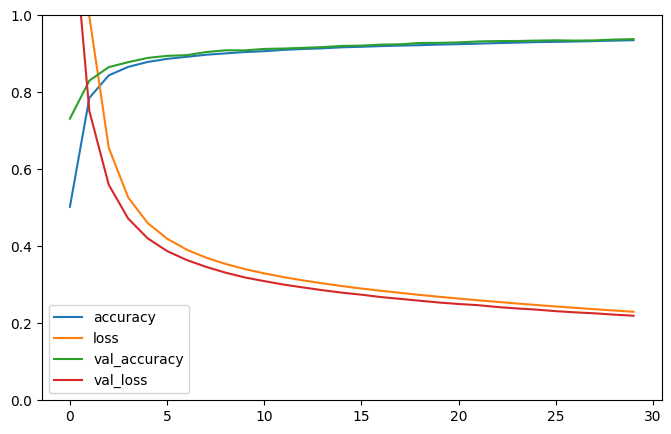

In [28]:
history2Data = pd.DataFrame(history2.history)
history2Data.plot(figsize=(8, 5),ylim=(0,1))

The model is now not overfitting anymore, but the overall accuracy is worse. Lets add some more epochs.

In [29]:
history2 = model2.fit(X_train_new, y_train_new, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.9359 - loss: 0.2271 - val_accuracy: 0.9382 - val_loss: 0.2168
Epoch 2/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.9375 - loss: 0.2219 - val_accuracy: 0.9386 - val_loss: 0.2144
Epoch 3/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.9391 - loss: 0.2196 - val_accuracy: 0.9396 - val_loss: 0.2115
Epoch 4/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.9362 - loss: 0.2205 - val_accuracy: 0.9394 - val_loss: 0.2092
Epoch 5/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.9388 - loss: 0.2180 - val_accuracy: 0.9416 - val_loss: 0.2064
Epoch 6/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.9413 - loss: 0.2135 - val_accuracy: 0.9398 - val_loss: 0.2042
Epoch 7/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.9431 - loss: 0.2059 - val_accuracy: 0.9414 - val_loss: 0.2017
Epoch 8/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.9422 -

<Axes: >

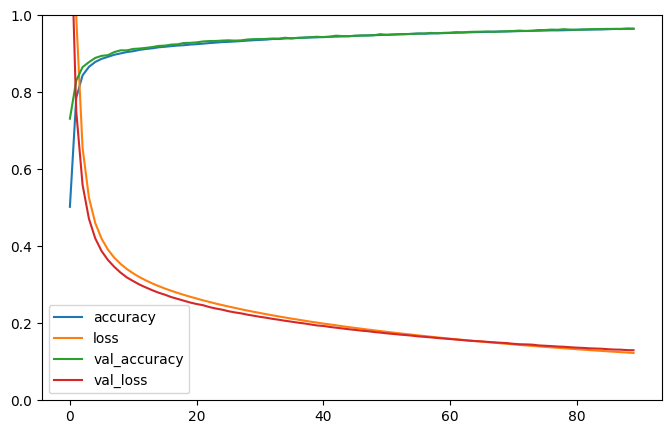

In [30]:
history2Data = pd.concat([history2Data,pd.DataFrame(history2.history)]).reset_index(drop=True)
history2Data.plot(figsize=(8, 5),ylim=(0,1))

We could keep training, but lets first try increasing the number of layers.

In [31]:
model3 = tf.keras.models.Sequential([
 tf.keras.layers.Input(shape=(28, 28)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"), 
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")
])
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)
model3.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [32]:
history3 = model3.fit(X_train_new, y_train_new, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - accuracy: 0.0928 - loss: 2.2867 - val_accuracy: 0.2874 - val_loss: 2.2032
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.3323 - loss: 2.1324 - val_accuracy: 0.4518 - val_loss: 1.7563
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.5144 - loss: 1.5646 - val_accuracy: 0.7140 - val_loss: 0.9737
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.7414 - loss: 0.8871 - val_accuracy: 0.8134 - val_loss: 0.6333
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.8178 - loss: 0.6188 - val_accuracy: 0.8582 - val_loss: 0.4937
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.8504 - loss: 0.4973 - val_accuracy: 0.8790 - val_loss: 0.4186
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8740 - loss: 0.4204 - val_accuracy: 0.8922 - val_loss: 0.3748
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.8849 -

<Axes: >

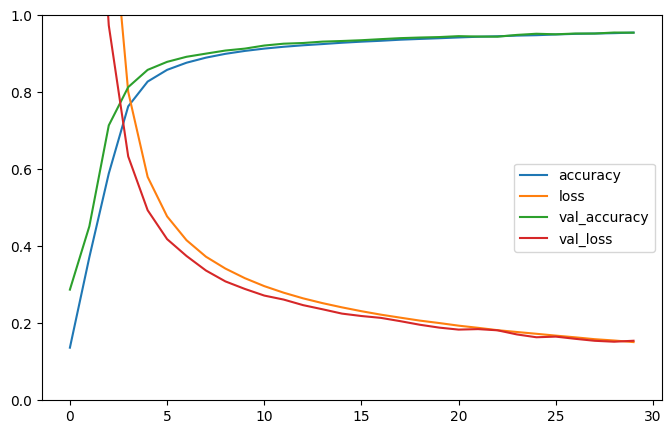

In [33]:
history3Data = pd.DataFrame(history3.history)
history3Data.plot(figsize=(8, 5),ylim=(0,1))

In [34]:
history3 = model3.fit(X_train_new, y_train_new, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.9561 - loss: 0.1444 - val_accuracy: 0.9544 - val_loss: 0.1492
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.9572 - loss: 0.1434 - val_accuracy: 0.9554 - val_loss: 0.1493
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.9583 - loss: 0.1369 - val_accuracy: 0.9544 - val_loss: 0.1446
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.9589 - loss: 0.1387 - val_accuracy: 0.9574 - val_loss: 0.1389
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.9582 - loss: 0.1372 - val_accuracy: 0.9588 - val_loss: 0.1398
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9607 - loss: 0.1312 - val_accuracy: 0.9592 - val_loss: 0.1400
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.9629 - loss: 0.1237 - val_accuracy: 0.9602 - val_loss: 0.1346
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.9620 -

<Axes: >

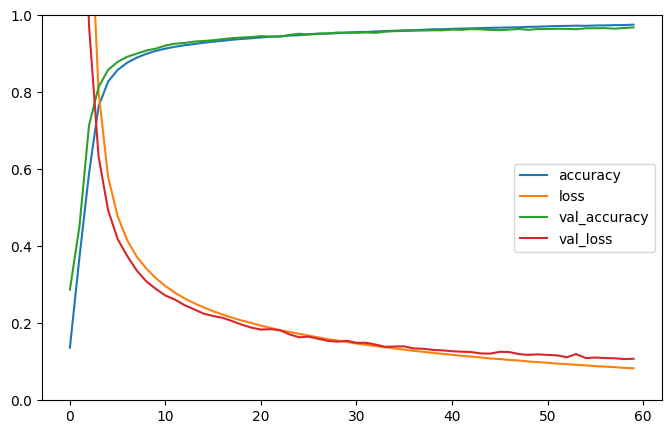

In [35]:
history3Data = pd.concat([history3Data,pd.DataFrame(history3.history)]).reset_index(drop=True)
history3Data.plot(figsize=(8, 5),ylim=(0,1))

The model shows high accuracy, but still overfits like before. Lets apply some regualrization in form of dropouts.

In [36]:
model4 = tf.keras.models.Sequential([
 tf.keras.layers.Input(shape=(28, 28)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation="softmax")
])
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)
model4.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [37]:
history4 = model4.fit(X_train_new, y_train_new, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1003 - loss: 2.3596 - val_accuracy: 0.1530 - val_loss: 2.2987
Epoch 2/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.1029 - loss: 2.3105 - val_accuracy: 0.1284 - val_loss: 2.2985
Epoch 3/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - accuracy: 0.1172 - loss: 2.2984 - val_accuracy: 0.1162 - val_loss: 2.2968
Epoch 4/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.1246 - loss: 2.2857 - val_accuracy: 0.1524 - val_loss: 2.2881
Epoch 5/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.1418 - loss: 2.2632 - val_accuracy: 0.1978 - val_loss: 2.2618
Epoch 6/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.1595 - loss: 2.2270 - val_accuracy: 0.2076 - val_loss: 2.2185
Epoch 7/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1889 - loss: 2.1805 - val_accuracy: 0.2138 - val_loss: 2.1759
Epoch 8/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.2094 - los

<Axes: >

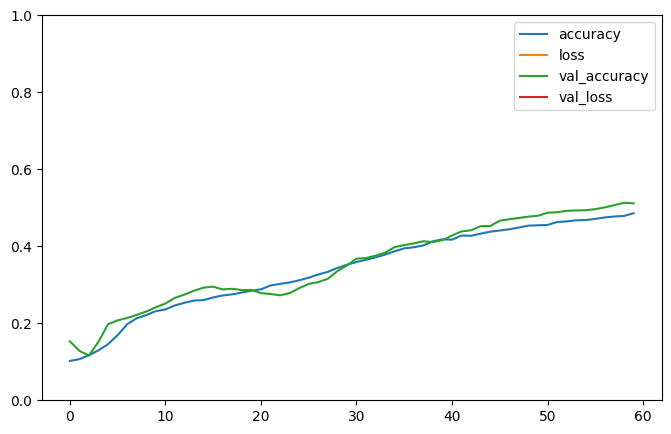

In [38]:
history4Data = pd.DataFrame(history4.history)
history4Data.plot(figsize=(8, 5),ylim=(0,1))

Convergening takes a lot longer. Let's add some more epoch. However, we want to avoid overfitting even more, so we can add some early stoppig. Furthermore, we define a learning schedule to speed things up early.

Other parameters were also tuned to yield a model with roughl 97-98% accuracy on training, test and validation.

In [39]:
learningSchedule = tf.keras.callbacks.ReduceLROnPlateau(
    mode="min",
    monitor="val_loss",
    factor=0.2,
    patience=5,
    min_lr=1e-05)

earlyStopping = tf.keras.callbacks.EarlyStopping(
    mode="min",
    monitor="val_loss",
    patience=5)


model = tf.keras.models.Sequential([
 tf.keras.layers.Input(shape=(28, 28)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation="gelu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10, activation="softmax")
])
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train_new, y_train_new, epochs=180, validation_data=(X_valid, y_valid), batch_size=32, callbacks=[learningSchedule, earlyStopping])

Epoch 1/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7219 - loss: 0.8400 - val_accuracy: 0.9570 - val_loss: 0.1687 - learning_rate: 0.0010
Epoch 2/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9386 - loss: 0.2406 - val_accuracy: 0.9632 - val_loss: 0.1469 - learning_rate: 0.0010
Epoch 3/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9541 - loss: 0.1883 - val_accuracy: 0.9700 - val_loss: 0.1264 - learning_rate: 0.0010
Epoch 4/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9613 - loss: 0.1617 - val_accuracy: 0.9740 - val_loss: 0.1226 - learning_rate: 0.0010
Epoch 5/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9647 - loss: 0.1479 - val_accuracy: 0.9730 - val_loss: 0.1204 - learning_rate: 0.0010
Epoch 6/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9666 - loss: 0.1386 - val_accuracy: 0.9758 - val_loss: 0.1119 - learning_rate: 0.0010
Epoch 7/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9

<Axes: >

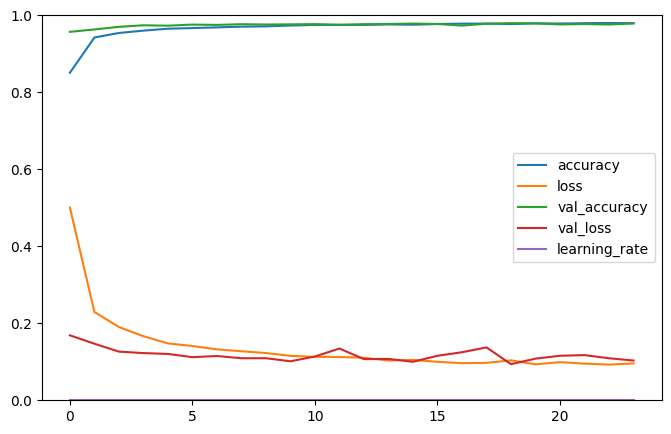

In [40]:
historyData = pd.DataFrame(history.history)
historyData.plot(figsize=(8, 5),ylim=(0,1))

In [41]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9747 - loss: 0.1322


[0.10864011198282242, 0.979200005531311]

Re-write to be more concise

In [42]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(28, 28)))
# add the first layer, a Flatten layer, to convert each input image into a 1D array
model.add(tf.keras.layers.Flatten())

# add Dense layers
for _ in range(10):
    model.add(tf.keras.layers.Dense(128, activation="gelu"))
    model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])



In [43]:
learningSchedule = tf.keras.callbacks.ReduceLROnPlateau(
    mode="min",
    monitor="val_loss",
    factor=0.2,
    patience=5,
    min_lr=1e-05)

earlyStopping = tf.keras.callbacks.EarlyStopping(
    mode="min",
    monitor="val_loss",
    patience=5)

checkpoints = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5", save_weights_only=True)

history = model.fit(
    X_train_new, y_train_new, epochs=180, validation_data=(X_valid, y_valid), 
    batch_size=32, callbacks=[checkpoints, learningSchedule, earlyStopping]
    )

Epoch 1/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7073 - loss: 0.8611 - val_accuracy: 0.9516 - val_loss: 0.1941 - learning_rate: 0.0010
Epoch 2/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9408 - loss: 0.2395 - val_accuracy: 0.9626 - val_loss: 0.1487 - learning_rate: 0.0010
Epoch 3/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9535 - loss: 0.1915 - val_accuracy: 0.9698 - val_loss: 0.1333 - learning_rate: 0.0010
Epoch 4/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9589 - loss: 0.1680 - val_accuracy: 0.9700 - val_loss: 0.1238 - learning_rate: 0.0010
Epoch 5/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9631 - loss: 0.1531 - val_accuracy: 0.9732 - val_loss: 0.1153 - learning_rate: 0.0010
Epoch 6/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9692 - loss: 0.1329 - val_accuracy: 0.9704 - val_loss: 0.1378 - learning_rate: 0.0010
Epoch 7/180
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9

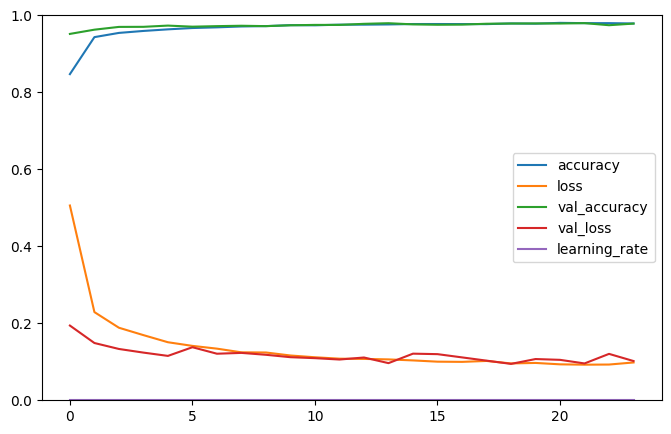

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9708 - loss: 0.1510


[0.12646496295928955, 0.9753000140190125]

In [44]:
historyData = pd.DataFrame(history.history)
historyData.plot(figsize=(8, 5),ylim=(0,1))
plt.show()

model.evaluate(X_test, y_test)

In [45]:
model.save("MNIST_Sequential_Model.h5")

## Using keras-tuner

While hyperparameter tuning manually works, it is tedious. Therefore, the preocess is repeated using the keras-tuner module.

In [46]:
import keras_tuner as kt

### Define model

First, the model is defined within a function that uses the hp (hyperparameter) argument as parameter. We can then define different things to iterate over, like integers (hp.Int) for things like the number of hidden layers or neurons, or hp. Float for flots like the dropout rate, learning rate, etc.

In [49]:
def buildModel(hp):

    # define hyperparameters (hp)
    nHidden = hp.Int("nHidden", min_value=1, max_value=12, step=1, default=2)
    nNeurons = hp.Int("nNeurons", min_value=32, max_value=512, step=32, default=128)
    dropout = hp.Float("dropout", min_value=0.2, max_value=0.5, step=0.1, default=0.2)

    optimizer = hp.Choice("optimizer", ["adam", "sgd"])
    if optimizer == "adam":
        opt = tf.keras.optimizers.Adam()
    else: 
        opt = tf.keras.optimizers.SGD()

    # initialize the model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28)))
    model.add(tf.keras.layers.Flatten())

    # add hidden layers
    for _ in range(nHidden):
        model.add(tf.keras.layers.Dense(nNeurons, activation="gelu"))
        model.add(tf.keras.layers.Dropout(dropout))

    # define output layer    
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    # compile the model
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

### Define the tuner

After the model and hyperparameters are specified, the actual tuner has to be chosen. Here, a hyperband is used for its computational efficiency.

In [50]:
tuner = kt.Hyperband(
    buildModel,
    objective="val_accuracy",
    max_epochs=15,
    factor=3,
    directory="/users/david/Documents/GitHub/Projects/Deeplearning/MNIST_Tensorflow",
    project_name="MNIST_Hyperband"
)

In [51]:
earlyStopping = tf.keras.callbacks.EarlyStopping(mode="min", monitor="val_loss", patience=5, restore_best_weights=True)
learningSchedule = tf.keras.callbacks.ReduceLROnPlateau(mode="min", monitor="val_loss", factor=0.2, patience=5, min_lr=1e-05)
chechpoints = tf.keras.callbacks.ModelCheckpoint("/users/david/Documents/GitHub/Projects/Deeplearning/MNIST_Tensorflow/my_checkpoints.weights.h5",
                                                 save_weights_only=True)

tuner.search(X_train_new, y_train_new, epochs=100, 
             validation_data=(X_valid, y_valid), callbacks=[earlyStopping, learningSchedule, chechpoints])

Trial 30 Complete [00h 00m 27s]
val_accuracy: 0.9621999859809875

Best val_accuracy So Far: 0.982200026512146
Total elapsed time: 00h 26m 15s


In [52]:
tuner.get_best_hyperparameters()[0].values

{'nHidden': 4,
 'nNeurons': 352,
 'dropout': 0.2,
 'optimizer': 'adam',
 'tuner/epochs': 15,
 'tuner/initial_epoch': 5,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0012'}

In [56]:
model = tuner.hypermodel.build(tuner.get_best_hyperparameters()[0])

In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 352)            │       276,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 352)            │       124,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 352)            │       124,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 352)            │       124,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         3,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,618 (2.49 MB)

 Trainable params: 652,618 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(X_train_new, y_train_new, epochs=100, validation_data=(X_valid, y_valid),
                    callbacks=[earlyStopping, learningSchedule, chechpoints])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8648 - loss: 0.4230 - val_accuracy: 0.9676 - val_loss: 0.1102 - learning_rate: 0.0010
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9615 - loss: 0.1328 - val_accuracy: 0.9662 - val_loss: 0.1174 - learning_rate: 0.0010
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9688 - loss: 0.1063 - val_accuracy: 0.9754 - val_loss: 0.0964 - learning_rate: 0.0010
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9747 - loss: 0.0883 - val_accuracy: 0.9792 - val_loss: 0.0747 - learning_rate: 0.0010
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9795 - loss: 0.0750 - val_accuracy: 0.9810 - val_loss: 0.0839 - learning_rate: 0.0010
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9805 - loss: 0.0697 - val_accuracy: 0.9798 - val_loss: 0.0814 - learning_rate: 0.0010
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.

<Axes: >

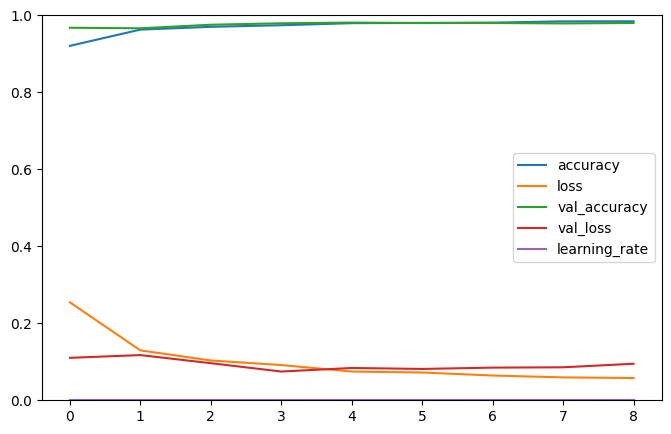

In [59]:
historyData = pd.DataFrame(history.history)
historyData.plot(figsize=(8, 5),ylim=(0,1))

In [60]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.9747 - loss: 0.0961


[0.0837070643901825, 0.9776999950408936]

In [61]:
tf.keras.models.save_model(model, "MNIST_Hyperband_Model.h5")